
Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB

First Few Rows of Data:

   instant      dteday  season  yr  mnth  holid

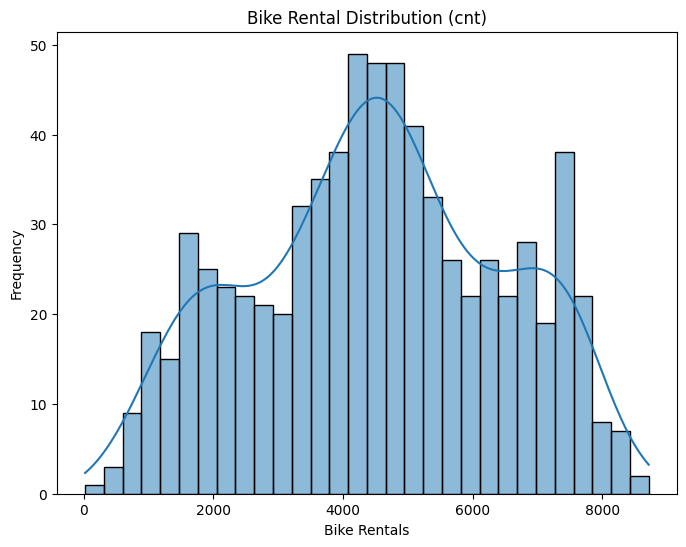

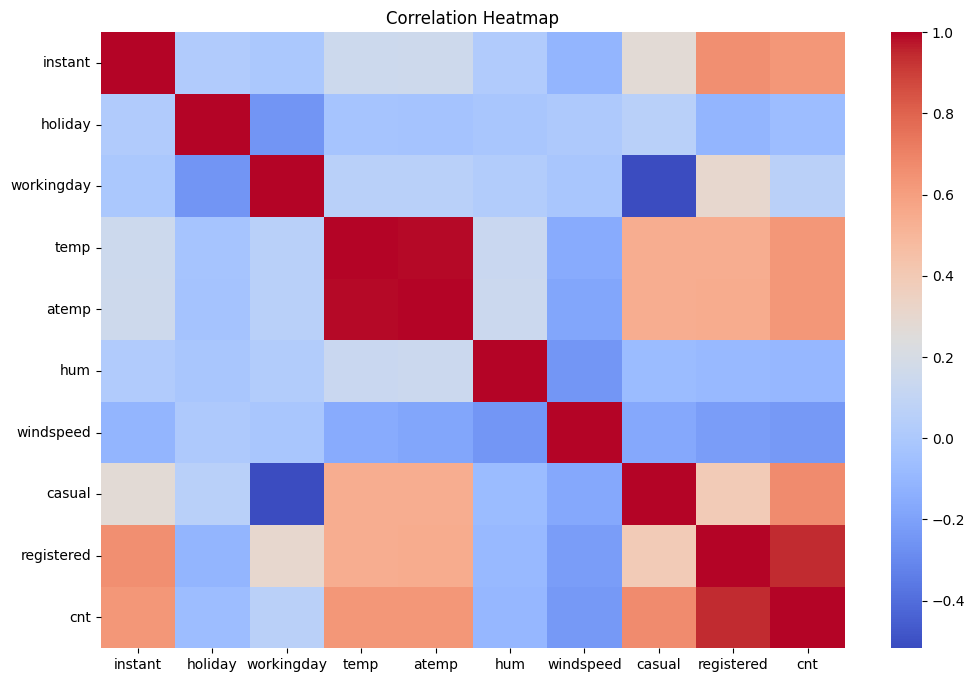


Feature Importance:

                       Feature  Coefficient
11                     yr_2019  1953.194148
8                season_Winter   636.432851
19                      mnth_9   604.038467
13                      mnth_3   446.131760
28                   weekday_6   390.758900
1                   workingday   319.781429
20                     mnth_10   299.389006
15                      mnth_5   238.419418
12                      mnth_2   124.189508
27                   weekday_5   109.678682
7                season_Summer    94.022726
3                        atemp    57.283834
26                   weekday_4    52.850466
2                         temp    49.842978
25                   weekday_3    29.086856
16                      mnth_6   -12.785192
4                          hum   -14.155596
5                    windspeed   -35.188674
14                      mnth_4   -35.859225
23                   weekday_1   -53.081155
18                      mnth_8  -103.240979
24        

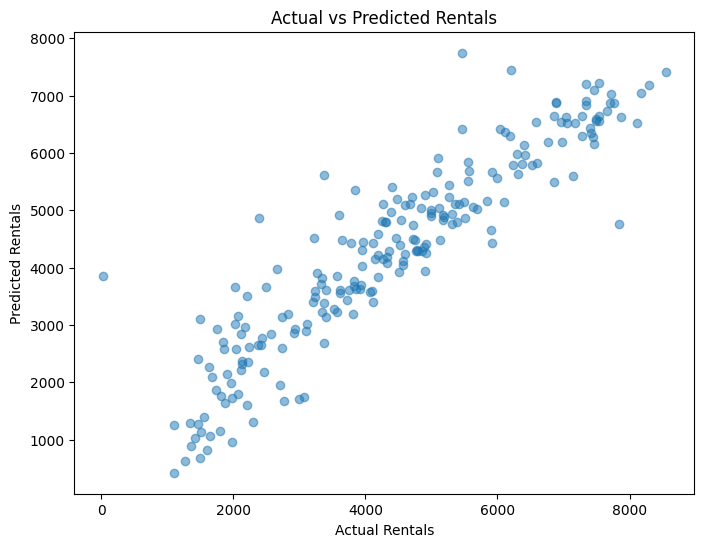

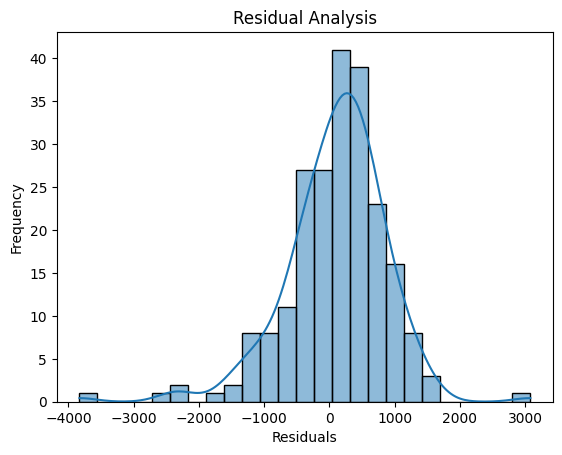


Results saved at C:\Users\3913\Downloads\bike_rental_predictions.csv


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the path to the dataset and load it
file_path = 'C:\\Users\\3913\\Downloads\\day.csv'
bike_data = pd.read_csv(file_path)

# Display basic information about the dataset
print("\nDataset Overview:\n")
bike_data.info()
print("\nFirst Few Rows of Data:\n")
print(bike_data.head())

# Data Cleaning and Preprocessing
# Replace numerical codes with descriptive names for certain columns
bike_data['season'] = bike_data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
bike_data['weathersit'] = bike_data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})
bike_data['yr'] = bike_data['yr'].map({0: '2018', 1: '2019'})

# Check for missing data in the dataset
print("\nMissing Data Summary:\n")
print(bike_data.isnull().sum())

# Convert categorical variables into dummy/indicator variables
bike_data = pd.get_dummies(bike_data, columns=['season', 'weathersit', 'yr', 'mnth', 'weekday'], drop_first=True)

# Define the target variable and features
features = bike_data.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
target = bike_data['cnt']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Generate predictions using the trained model
predictions = linear_model.predict(X_test)

# Evaluate the model's performance
r2_value = r2_score(y_test, predictions)
mean_sq_error = mean_squared_error(y_test, predictions)
mean_abs_error = mean_absolute_error(y_test, predictions)
root_mean_sq_error = np.sqrt(mean_sq_error)

# Print evaluation metrics
print(f"\nR-squared Value: {r2_value}")
print(f"Mean Squared Error: {mean_sq_error}")
print(f"Mean Absolute Error: {mean_abs_error}")
print(f"Root Mean Squared Error: {root_mean_sq_error}")

# Visualizations
# 1. Distribution of the Target Variable
plt.figure(figsize=(8, 6))
sns.histplot(bike_data['cnt'], kde=True, bins=30)
plt.title('Bike Rental Distribution (cnt)')
plt.xlabel('Bike Rentals')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_features = bike_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_features.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 3. Feature Importance
coeff_df = pd.DataFrame({'Feature': features.columns, 'Coefficient': linear_model.coef_})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance:\n")
print(coeff_df)

# 4. Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Rentals')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.show()

# 5. Residual Analysis
residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.title("Residual Analysis")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Save the results to a CSV file
result_path = 'C:\\Users\\3913\\Downloads\\bike_rental_predictions.csv'
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).to_csv(result_path, index=False)
print(f"\nResults saved at {result_path}")
